In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix


Epoch 1/500
31/31 [==============================] - 1s 14ms/step - loss: 2.0621 - accuracy: 0.2970 - val_loss: 1.7147 - val_accuracy: 0.4315
Epoch 2/500
31/31 [==============================] - 0s 6ms/step - loss: 1.6056 - accuracy: 0.5006 - val_loss: 1.4993 - val_accuracy: 0.5481
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 1.3575 - accuracy: 0.5843 - val_loss: 1.2076 - val_accuracy: 0.6319
Epoch 4/500
31/31 [==============================] - 0s 6ms/step - loss: 1.1318 - accuracy: 0.6942 - val_loss: 1.1237 - val_accuracy: 0.6738
Epoch 5/500
31/31 [==============================] - 0s 6ms/step - loss: 0.9940 - accuracy: 0.7397 - val_loss: 0.9867 - val_accuracy: 0.7178
Epoch 6/500
31/31 [==============================] - 0s 6ms/step - loss: 0.8469 - accuracy: 0.7674 - val_loss: 0.8191 - val_accuracy: 0.7699
Epoch 7/500
31/31 [==============================] - 0s 5ms/step - loss: 0.7703 - accuracy: 0.7872 - val_loss: 0.7335 - val_accuracy: 0.7955
Epoch 8/500


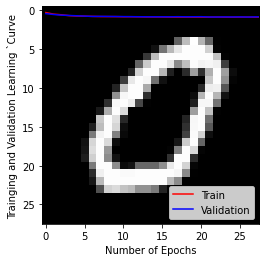

In [2]:
images = np.load('/content/sample_data/images.npy')
flattened_images = []

#flattening images to vector
for image in images:
    image = image.flatten()
    flattened_images.append(image)

flattened_images = np.array(flattened_images)

#converting lables to hot vectors
labels = np.load('/content/sample_data/labels.npy')
hot_labels = []

for label in labels:
    hot_vector = [0,0,0,0,0,0,0,0,0,0]    
    hot_vector[label] = 1
    hot_labels.append(hot_vector)

#making a container and assigning labels to corresponding flat image
#container = [[flat image, label], .....]

container = []

for i in range(len(flattened_images)):
    element = []
    element.append(flattened_images[i])
    element.append(hot_labels[i])
    container.append(element)

#randomly shuffling the container
random.shuffle(container)

#Stratified Sampling
class_list = [[],[],[],[],[],[],[],[],[],[]]

for elem in container:
    ind = np.argmax(elem[1])
    class_list[ind].append(elem)

training_set = []
validation_set = []
test_set = []

for each_class in class_list:
    for i in range(0,int(0.6*len(each_class))):
        training_set.append(each_class[i])
    for i in range(int(0.6*len(each_class)), int(0.75*len(each_class))):
        validation_set.append(each_class[i])
    for i in range(int(0.75*len(each_class)), len(each_class) ):
        test_set.append(each_class[i])


#Assigning appropriate values to X_train and Y_train
x_train = []
y_train = []

for elem in training_set:
    x_train.append(elem[0])
    y_train.append(elem[1])

#Assigning appropriate values to x_val and y_val
x_val = []
y_val = []

for elem in validation_set:
    x_val.append(elem[0])
    y_val.append(elem[1])

#Assigning appropriate values to X_test and Y_test
x_test = []
y_test = []

for elem in test_set:
    x_test.append(elem[0])
    y_test.append(elem[1])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)


# Model Template

model = Sequential() # declare model
model.add(Dense(100, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
model.add(Activation('selu'))

#-----------------------------------------------------------------------------

# Fill in Model Here
#kernel initializer = random_normal, he_normal
#activation function = relu, selu, tanh, sigmoid
model.add(Dense(100, kernel_initializer='he_normal'))
model.add(Activation('tanh'))

model.add(Dense(100, kernel_initializer='he_normal'))
model.add(Activation('relu'))

model.add(Dense(100, kernel_initializer='he_normal'))
model.add(Activation('tanh'))

#-----------------------------------------------------------------------------

model.add(Dense(10, kernel_initializer='he_normal')) # last layer
model.add(Activation('softmax'))


# Compile Model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# Train Model
history = model.fit(x_train, y_train, 
                    validation_data = (x_val, y_val), 
                    epochs=500, 
                    batch_size=128)

test = model.evaluate(x_test, y_test, verbose=1)

#Saving the model
model.save('image classifier.h5')

# Report Results

plot_data = history.history
plt.plot(range(0,500), plot_data['accuracy'], "r", label = "Train")
plt.plot(range(0,500), plot_data['val_accuracy'], "b", label = "Validation")
plt.legend(loc = "lower right")
plt.xlabel("Number of Epochs")
plt.ylabel("Trainging and Validation Learning `Curve")
# plt.show()

y_predicted = model.predict(x_test)

#constructing the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis = 1))
print()
print("*****Confusion Matrix*****")
print()
print(conf_matrix)
print()

#Accuracy score
sum_diag = 0
for i in range(10):
    for j in range(10):
        if i==j:
            sum_diag += conf_matrix[i][j]

acc_score_manual = sum_diag/np.sum(conf_matrix)
print()
print("*****Accuracy Score*****")
print(acc_score_manual)
print()

#Precision score
prec_score = []
for i in range(10):
    cell = conf_matrix[i][i]
    sum_col = 0
    for j in range(10):
        sum_col += conf_matrix[j][i]
    prec_score.append(cell/sum_col)

print()
print("*****Precision Score*****")
print(prec_score)
print()

#Recall score
recall_score = []
for i in range(10):
    cell = conf_matrix[i][i]
    sum_row = 0
    for j in range(10):
        sum_row += conf_matrix[i][j]
    recall_score.append(cell/sum_row)

print()
print("*****Recall Score*****")
print(recall_score)
print()

#Displaying misread images
ind_list = []
count = 0
while True:
    if np.argmax(y_test[count]) != np.argmax(y_predicted[count]):
        ind_list.append(count)
    count += 1
    if len(ind_list) >= 3:
        break

image_1 = x_test[0].reshape(28,28)
image_2 = x_test[1].reshape(28,28)
image_3 = x_test[2].reshape(28,28)

plt.imshow(image_1, cmap='gray')
# plt.show()

plt.imshow(image_2, cmap='gray')
# plt.show()

plt.imshow(image_3, cmap='gray')
# plt.show()